# 4 Pre-Processing and Training Data

## 4.1 Imports

In [67]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree, metrics
from io import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
import pickle
from sklearn.neighbors import KNeighborsClassifier
from sklearn import __version__ as sklearn_version
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve, ShuffleSplit
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.metrics import accuracy_score, confusion_matrix
from library.sb_utils import save_file

## 4.2 Load Data

In [68]:
df= pd.read_csv('../Data/step3_features.csv')

In [69]:
df.head()

,account_number,merchant,trans_amount,first_name,last_name,street,city,state,zip,lat,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
0,2703186189652095,"fraud_Rippin, Kub and Mann",4.97,Jennifer,Banks,561 Perry Cove,Moravian Falls,NC,28654,36.0788,...,0,0,0,1,0,0,0,0,0,0
1,630423337322,"fraud_Heller, Gutmann and Zieme",107.23,Stephanie,Gill,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,...,0,0,0,0,0,0,0,0,0,0
2,38859492057661,fraud_Lind-Buckridge,220.11,Edward,Sanchez,594 White Dale Suite 530,Malad City,ID,83252,42.1808,...,0,0,0,0,0,0,0,0,0,1
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",45.00,Jeremy,White,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,...,0,0,0,0,0,0,0,0,0,1
4,375534208663984,fraud_Keeling-Crist,41.96,Tyler,Garcia,408 Bradley Rest,Doe Hill,VA,24433,38.4207,...,0,0,0,0,1,0,0,0,0,1


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 37 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   account_number           1296675 non-null  int64  
 1   merchant                 1296675 non-null  object 
 2   trans_amount             1296675 non-null  float64
 3   first_name               1296675 non-null  object 
 4   last_name                1296675 non-null  object 
 5   street                   1296675 non-null  object 
 6   city                     1296675 non-null  object 
 7   state                    1296675 non-null  object 
 8   zip                      1296675 non-null  int64  
 9   lat                      1296675 non-null  float64
 10  long                     1296675 non-null  float64
 11  city_pop                 1296675 non-null  int64  
 12  job                      1296675 non-null  object 
 13  trans_num                1296675 non-null 

## 4.3 Train/Test Split

> Split the data into train/test sets with 75/25 ratio

In [71]:
X=df.drop(columns='is_fraud')
y=df.is_fraud

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=47, stratify= y)

In [73]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((972506, 36), (324169, 36), (972506,), (324169,))

In [74]:
#Save the merchant', 'first', 'last', 'street', 'city', 'state', 'job', and 'trans_num' columns 
#from the train/test data into names_train and names_test and drop those columns from `X_train` and `X_test`. 

names_list=['merchant', 'first_name', 'last_name', 'street', 'city', 'state', 'job', 'trans_num']
names_train = X_train[names_list]
names_test = X_test[names_list]
X_train.drop(columns=names_list, inplace=True)
X_test.drop(columns=names_list, inplace=True)
X_train.shape, X_test.shape

((972506, 28), (324169, 28))

In [75]:
#Check the `dtypes` attribute of `X_train` to verify all features are numeric
X_train.dtypes

account_number               int64
trans_amount               float64
zip                          int64
lat                        float64
long                       float64
city_pop                     int64
merch_lat                  float64
merch_long                 float64
trans_year                   int64
trans_month                  int64
trans_day_of_month           int64
trans_day_of_week            int64
trans_hour                   int64
age                          int64
category_food_dining         int64
category_gas_transport       int64
category_grocery_net         int64
category_grocery_pos         int64
category_health_fitness      int64
category_home                int64
category_kids_pets           int64
category_misc_net            int64
category_misc_pos            int64
category_personal_care       int64
category_shopping_net        int64
category_shopping_pos        int64
category_travel              int64
gender_M                     int64
dtype: object

In [76]:
#Repeat this check for the test split in `X_test`
X_test.dtypes

account_number               int64
trans_amount               float64
zip                          int64
lat                        float64
long                       float64
city_pop                     int64
merch_lat                  float64
merch_long                 float64
trans_year                   int64
trans_month                  int64
trans_day_of_month           int64
trans_day_of_week            int64
trans_hour                   int64
age                          int64
category_food_dining         int64
category_gas_transport       int64
category_grocery_net         int64
category_grocery_pos         int64
category_health_fitness      int64
category_home                int64
category_kids_pets           int64
category_misc_net            int64
category_misc_pos            int64
category_personal_care       int64
category_shopping_net        int64
category_shopping_pos        int64
category_travel              int64
gender_M                     int64
dtype: object

We only have numeric features in X.

## 4.4 Models

### 4.4.1 Decision Tree- Entropy Model 

Build a decision tree to predict if a transaction is fraudulent or not. 

In [11]:
# dt_model = tree.DecisionTreeClassifier()

In [12]:
# metrics.get_scorer_names()

In [13]:
# param_grid1 = {'criterion': ['gini', 'entropy'], 'max_depth': np.arange(2, 5)}
# dt_model_cv= GridSearchCV(dt_model,param_grid1,cv=5, scoring='f1')
# dt_model_cv.fit(X_train,y_train)

In [14]:
# dt_model_cv.best_params_

In [15]:
# dt_model_cv_results = cross_validate(dt_model_cv.best_estimator_, X_train, y_train, cv=5)
# dt_best_scores = dt_model_cv_results['test_score']
# dt_best_scores

In [16]:
d= [i for i in range(3,20)]
training_accuracy=[]
testing_accuracy=[]

for max_d in d:
    entr_model = tree.DecisionTreeClassifier(criterion="entropy", random_state = 1234, max_depth=max_d, class_weight='balanced')
    entr_model.fit(X_train,y_train)
    y_tr_pred1 = entr_model.predict(X_train) 
    y_te_pred1 = entr_model.predict(X_test)
    tr_accuracy= metrics.recall_score(y_train,y_tr_pred1)
    training_accuracy.append(tr_accuracy)
    te_accuracy= metrics.recall_score(y_test,y_te_pred1)
    testing_accuracy.append(te_accuracy)
    

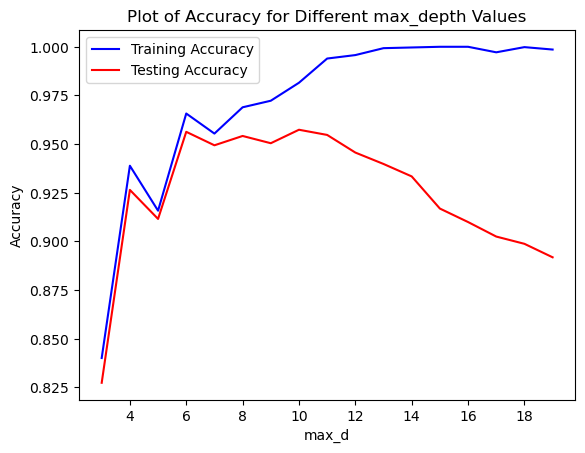

In [17]:
plt.plot(d, training_accuracy, color='blue', label='Training Accuracy')
plt.plot(d, testing_accuracy, color='red', label='Testing Accuracy')
plt.legend()
plt.xlabel('max_d')
plt.ylabel('Accuracy')
plt.title('Plot of Accuracy for Different max_depth Values')
plt.show();

Seems like the best max_d paramter is 6 for which the Recall score is about 95%. 

In [18]:
max_d=6
entr_model = tree.DecisionTreeClassifier(criterion="entropy", random_state = 1234, max_depth=max_d, class_weight='balanced')
entr_model.fit(X_train,y_train)
y_pred1 = entr_model.predict(X_train) 
y_pred1 = pd.Series(y_pred1) 

# model evaluation 
print("Model: Entropy model, max_depth= {}".format(max_d))
print("Accuracy:", metrics.accuracy_score(y_train,y_pred1))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_train,y_pred1))
print('Precision score:' , metrics.precision_score(y_train,y_pred1))
print('Recall score:' , metrics.recall_score(y_train,y_pred1))
print('F1 score:' , metrics.f1_score(y_train,y_pred1))


Model: Entropy model, max_depth= 6
Accuracy: 0.9531036312372366
Balanced accuracy: 0.9593717452697146
Precision score: 0.10690265486725664
Recall score: 0.965713270563155
F1 score: 0.1924963260680961


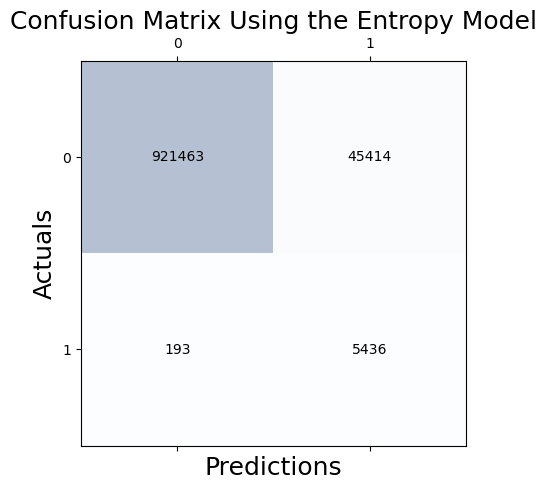

In [19]:
conf_matrix1 = confusion_matrix(y_true=y_train, y_pred=y_pred1)

# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix1, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix1.shape[0]):
    for j in range(conf_matrix1.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix1[i, j], va='center', ha='center')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix Using the Entropy Model', fontsize=18)
plt.show()

### 4.4.2 Decision Tree -Gini Impurity Model

In [20]:
d= [i for i in range(3,20)]
training_accuracy2=[]
testing_accuracy2=[]

for max_d in d:
    gini_model = tree.DecisionTreeClassifier(criterion="gini", random_state = 1234, max_depth=max_d, class_weight='balanced')
    gini_model.fit(X_train,y_train)
    y_tr_pred2 = gini_model.predict(X_train) 
    y_te_pred2 = gini_model.predict(X_test)
    tr_accuracy2= metrics.recall_score(y_train,y_tr_pred2)
    training_accuracy2.append(tr_accuracy2)
    te_accuracy2= metrics.recall_score(y_test,y_te_pred2)
    testing_accuracy2.append(te_accuracy2)
    

    #print('The training accuracy for max depth {} is'.format(max_d),metrics.recall_score(y_train,y_tr_pred1))
    #print('The validation accuracy for max depth {} is'.format(max_d),metrics.recall_score(y_test,y_te_pred1))

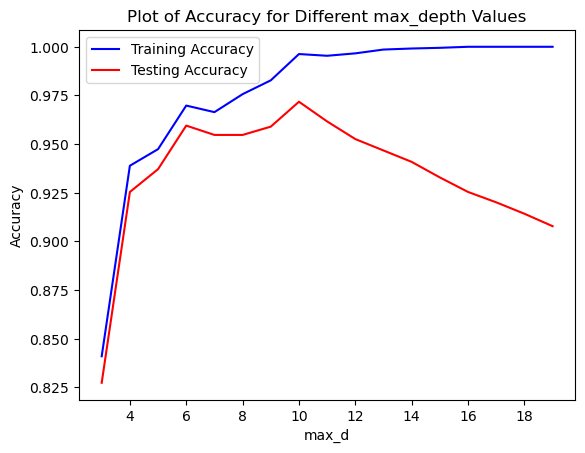

In [21]:
plt.plot(d, training_accuracy2, color='blue', label='Training Accuracy')
plt.plot(d, testing_accuracy2, color='red', label='Testing Accuracy')
plt.legend()
plt.xlabel('max_d')
plt.ylabel('Accuracy')
plt.title('Plot of Accuracy for Different max_depth Values')
plt.show();

Seems like the best max_d paramter is 10 for which the Recall score is about 97%. Therefore, both the Gini model and the Entropy model are performing pretty much the same, however, the Gini model has a slightly better accuracy and recall score and also less false positive.  

In [22]:
max_d=10
gini_model = tree.DecisionTreeClassifier(criterion="gini", random_state = 1234, max_depth=max_d, class_weight='balanced')
gini_model.fit(X_train,y_train)
y_pred2 = gini_model.predict(X_train) 
y_pred2 = pd.Series(y_pred2) 

# model evaluation 
print("Model: Gini model, max_depth= {}".format(max_d))
print("Accuracy:", metrics.accuracy_score(y_train,y_pred2))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_train,y_pred2))
print('Precision score:' , metrics.precision_score(y_train,y_pred2))
print('Recall score:' , metrics.recall_score(y_train,y_pred2))
print('F1 score:' , metrics.f1_score(y_train,y_pred2))


Model: Gini model, max_depth= 10
Accuracy: 0.9659086936224558
Balanced accuracy: 0.9810006293054914
Precision score: 0.14475620144033452
Recall score: 0.9962693195949547
F1 score: 0.2527834122154609


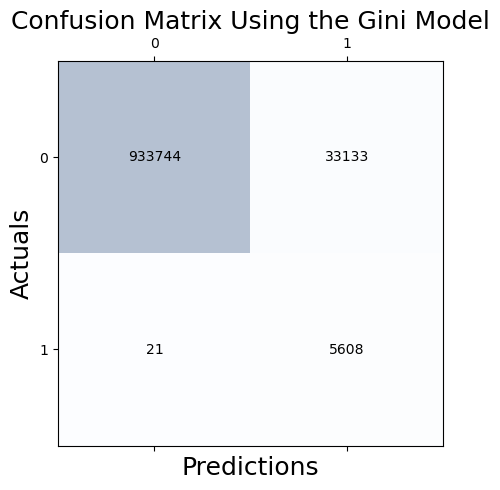

In [23]:
conf_matrix2 = confusion_matrix(y_true=y_train, y_pred=y_pred2)

# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix2, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix2.shape[0]):
    for j in range(conf_matrix2.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix2[i, j], va='center', ha='center')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix Using the Gini Model', fontsize=18)
plt.show()

### 4.4.3 Random Forrest

In [24]:
RF_Model = RandomForestClassifier(random_state=1234, class_weight='balanced')
RF_Model.fit(X_train, y_train)
y_pred3 = RF_Model.predict(X_train) 
y_pred3 = pd.Series(y_pred3) 

# model evaluation 
print("Model: Random Forest Model")
print("Accuracy:", metrics.accuracy_score(y_train,y_pred3))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_train,y_pred3))
print('Precision score:' , metrics.precision_score(y_train,y_pred3))
print('Recall score:' , metrics.recall_score(y_train,y_pred3))
print('F1 score:' , metrics.f1_score(y_train,y_pred3))

Model: Random Forest Model
Accuracy: 0.9999979434574182
Balanced accuracy: 0.9998223485521407
Precision score: 1.0
Recall score: 0.9996446971042814
F1 score: 0.999822316986496


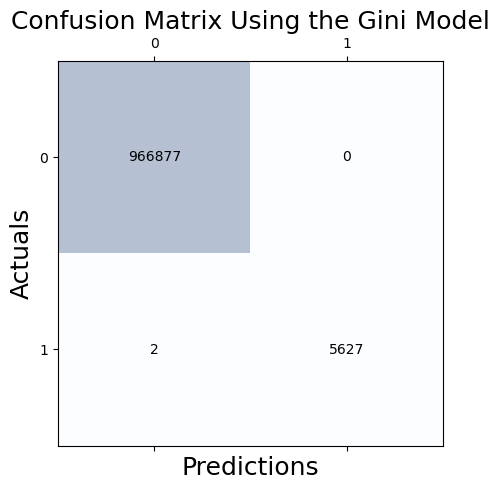

In [25]:
conf_matrix3 = confusion_matrix(y_true=y_train, y_pred=y_pred3)

# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix3, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix3.shape[0]):
    for j in range(conf_matrix3.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix3[i, j], va='center', ha='center')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix Using the Gini Model', fontsize=18)
plt.show()

In [39]:
# n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]

# RF_Model = RandomForestClassifier(random_state=1234)
# param_grid = {'n_estimators': n_est, 'max_depth': np.arange(3, 10), 'criterion':['gini', 'entropy']}


param_grid = {'max_depth': np.arange(2, 10), 'criterion':['gini, entropy']}

RF_Model_cv= GridSearchCV(RF_Model,param_grid,cv=5)


In [40]:
RF_Model_cv.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=1234),
             param_grid={'criterion': ['entropy'],
                         'max_depth': array([5, 6, 7, 8, 9])})

In [41]:
RF_Model_cv.best_params_

{'criterion': 'entropy', 'max_depth': 9}

The Random Forest with max_depth of 9 and criterion Entorpy could almost perfectly fit our train data.

### 4.4.4 Gradient Boosting

In [42]:
GB_Model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, random_state=0)
GB_Model.fit(X_train, y_train)
y_pred4 = GB_Model.predict(X_train) 
y_pred4 = pd.Series(y_pred4) 

# model evaluation 
print("Model: Gradient Boosting Model")
print("Accuracy:", metrics.accuracy_score(y_train,y_pred4))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_train,y_pred4))
print('Precision score:' , metrics.precision_score(y_train,y_pred4))
print('Recall score:' , metrics.recall_score(y_train,y_pred4))
print('F1 score:' , metrics.f1_score(y_train,y_pred4))

Model: Gradient Boosting Model
Accuracy: 0.9953604399355891
Balanced accuracy: 0.6509671703407008
Precision score: 0.743993010048056
Recall score: 0.302540415704388
F1 score: 0.43015913109371057


In [ ]:
# GB_pipe= make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=123))

In [ ]:
# GB_pipe.get_params().keys()

In [ ]:
# n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
# grid_params = {
#         'gradientboostingclassifier__n_estimators': n_est,
#         'standardscaler': [StandardScaler(), None],
#         'gradientboostingclassifier__max_depth': np.arange(2,15)
# }
# grid_params

In [ ]:
# GB_grid_cv = GridSearchCV(GB_pipe, grid_params, cv=5, n_jobs=-1)

In [ ]:
# GB_grid_cv.fit(X_train, y_train)

Entropy model with max_depth of 12 still has the highest F1 and Recall score. 

### 4.4.5 Hist Gradient Boosting

In [32]:
d= [i for i in range(3,20)]
training_accuracy5=[]
testing_accuracy5=[]

for max_d in d:
    HGB_Model = HistGradientBoostingClassifier(learning_rate=1.0,max_depth=max_d, random_state=1234)
    HGB_Model.fit(X_train, y_train)
    y_tr_pred5 = HGB_Model.predict(X_train) 
    y_te_pred5 = HGB_Model.predict(X_test)
    tr_accuracy5= metrics.recall_score(y_train,y_tr_pred5)
    training_accuracy5.append(tr_accuracy5)
    te_accuracy5= metrics.recall_score(y_test,y_te_pred5)
    testing_accuracy5.append(te_accuracy5)

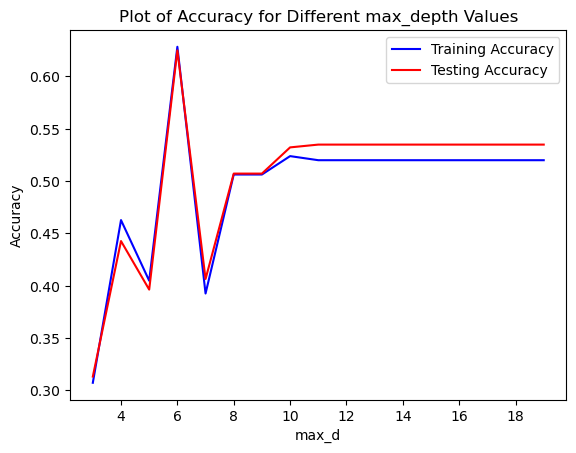

In [33]:
plt.plot(d, training_accuracy5, color='blue', label='Training Accuracy')
plt.plot(d, testing_accuracy5, color='red', label='Testing Accuracy')
plt.legend()
plt.xlabel('max_d')
plt.ylabel('Accuracy')
plt.title('Plot of Accuracy for Different max_depth Values')
plt.show();

In [34]:
max_d= 10
HGB_Model = HistGradientBoostingClassifier(learning_rate=1.0,max_depth=max_d, random_state=1234)
HGB_Model.fit(X_train, y_train)
y_pred5 = HGB_Model.predict(X_train) 
y_pred5 = pd.Series(y_pred5) 

# model evaluation 
print("Model: Hist Gradient Boosting Model")
print("Accuracy:", metrics.accuracy_score(y_train,y_pred5))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_train,y_pred5))
print('Precision score:' , metrics.precision_score(y_train,y_pred5))
print('Recall score:' , metrics.recall_score(y_train,y_pred5))
print('F1 score:' , metrics.f1_score(y_train,y_pred5))

Model: Hist Gradient Boosting Model
Accuracy: 0.9963691740719337
Balanced accuracy: 0.7615069832093558
Precision score: 0.7760526315789473
Recall score: 0.5238941197370759
F1 score: 0.6255170219535476


### 4.4.6 AdaBoost Classifier


In [43]:
Ada_Model = AdaBoostClassifier(n_estimators=100, random_state=0)
Ada_Model.fit(X_train, y_train)
y_pred6 = Ada_Model.predict(X_train) 
y_pred6 = pd.Series(y_pred6) 

# model evaluation 
print("Model: AdaBoost Classifier Model")
print("Accuracy:", metrics.accuracy_score(y_train,y_pred6))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_train,y_pred6))
print('Precision score:' , metrics.precision_score(y_train,y_pred6))
print('Recall score:' , metrics.recall_score(y_train,y_pred6))
print('F1 score:' , metrics.f1_score(y_train,y_pred6))

Model: AdaBoost Classifier Model
Accuracy: 0.9956339600989609
Balanced accuracy: 0.7154816924236045
Precision score: 0.6986498132720482
Recall score: 0.43204832119381775
F1 score: 0.5339187705817783


### 4.4.7 Complement Naive Bayes

In [44]:
CNB_Model = ComplementNB(force_alpha=True)
CNB_Model.fit(X_train.drop(columns=['lat', 'long', 'merch_lat', 'merch_long']), y_train)
y_pred7 = CNB_Model.predict(X_train.drop(columns=['lat', 'long', 'merch_lat', 'merch_long']))

# model evaluation 
print("Model: Complement Naive Bayes Model")
print("Accuracy:", metrics.accuracy_score(y_train,y_pred7))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_train,y_pred7))
print('Precision score:' , metrics.precision_score(y_train,y_pred7))
print('Recall score:' , metrics.recall_score(y_train,y_pred7))
print('F1 score:' , metrics.f1_score(y_train,y_pred7))

Model: Complement Naive Bayes Model
Accuracy: 0.4452548364740166
Balanced accuracy: 0.6236082199990807
Precision score: 0.008336464572788424
Recall score: 0.804050453011192
F1 score: 0.01650183667702741


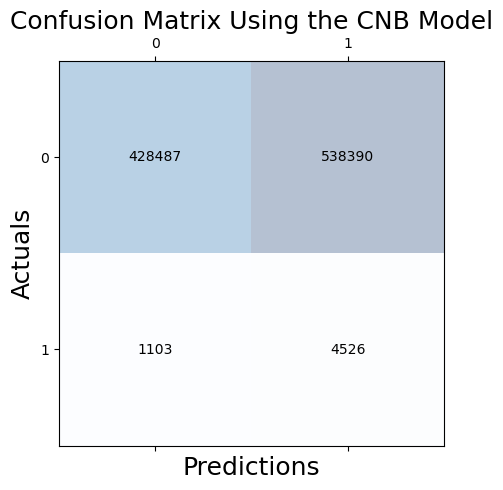

In [45]:
conf_matrix7 = confusion_matrix(y_true=y_train, y_pred=y_pred7)

# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix7, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix7.shape[0]):
    for j in range(conf_matrix7.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix7[i, j], va='center', ha='center')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix Using the CNB Model', fontsize=18)
plt.show()

Even though the recall score is pretty high, the accuracy is so low, the false positive are so high. 

## 4.5 Conclusion and Summary

Seven different models were implemented and the final scores were evaluated. All of the model had a high accuracy of about 99%. However, this is not a good metric to select the model since the data is imbalanced and the number of class 0 transactions (no fraud) is much higher than class 1 (fraud transactions). Therefore, we have a small positive class and the we would like to avoid false negative since we don't want to classify a fraud transaction as a valid transaction. Therefore, the metrics we should care about the most are F1 score and Recall score. Based on these two metrics, the Random Forest with max_depth of 9 and criterion Entorpy was the best model.

## 4.6 Save Best Model

In [46]:
best_model = RF_Model_cv.best_estimator_
best_model.version = '1.0'
best_model.pandas_version = pd.__version__
best_model.numpy_version = np.__version__
best_model.sklearn_version = sklearn_version
best_model.X_columns = [col for col in X_train.columns]


In [47]:
# save the model

modelpath = '../models'
save_file(best_model, 'credit_card_fraud_detection_model.pkl', modelpath)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "../models/credit_card_fraud_detection_model.pkl"


In [66]:
# Save test_data to be used later for model evaluation

y_test= pd.DataFrame(y_test)
test_data= pd.merge(X_test, y_test, left_index=True, right_index=True)
# save the test data to a new csv file
datapath = '../data'
save_file(test_data, 'test_data.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "../data/test_data.csv"
